In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/hp/Downloads/3mtt DeepTech/Week_2/Nigerian_Car_Prices.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.1+ KB


In [9]:
skewness = df['Year of manufacture'].skew()
print(f"Skewness of 'Year of Manufacture': {skewness}")

Skewness of 'Year of Manufacture': 0.0612110661725914


In [10]:
round(df['Year of manufacture'].mean())

2008

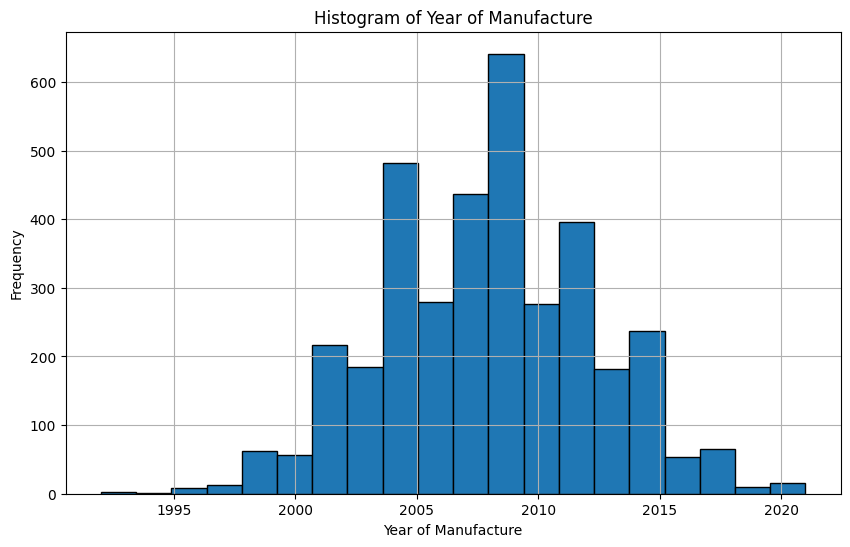

In [11]:
plt.figure(figsize=(10, 6))
df['Year of manufacture'].plot.hist(bins=20, edgecolor='black')
plt.title('Histogram of Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

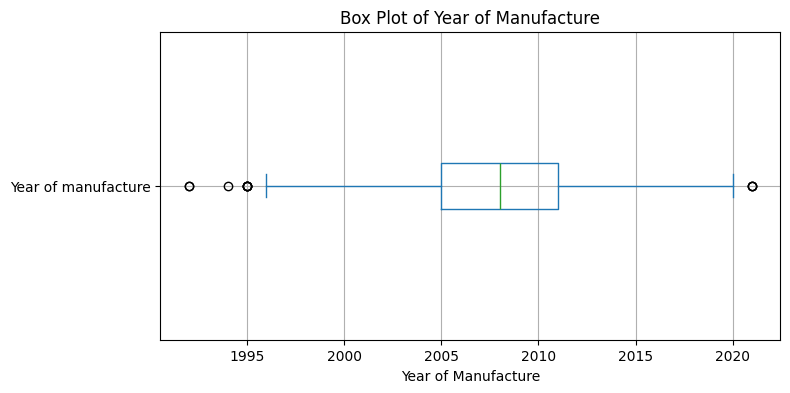

In [12]:
plt.figure(figsize=(8, 4))
df['Year of manufacture'].plot.box(vert=False)
plt.title('Box Plot of Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.grid(True)
plt.show()

In [29]:
print(df['Price'].dtype)

int64


In [32]:
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True)

In [21]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [35]:
# Calculate Q1, Q3 and IQR for the 'price' column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Outliers detected using IQR method:")
print(outliers)


Outliers detected using IQR method:
      Unnamed: 0           Make  Year of manufacture      Condition   Mileage  \
15            15           Fiat                  NaN            NaN      54.0   
21            21  Mercedes-Benz                  NaN            NaN   63085.0   
31            31  Mercedes-Benz                  NaN            NaN  145317.0   
32            32          Lexus               2011.0  Nigerian Used  105546.0   
34            34          Lexus                  NaN            NaN   98594.0   
...          ...            ...                  ...            ...       ...   
4037        4037        Changan               2020.0  Nigerian Used   17688.0   
4058        4058         Toyota               2018.0   Foreign Used   64098.0   
4061        4061     Volkswagen               2018.0   Foreign Used   28634.0   
4072        4072         Toyota               2016.0  Nigerian Used   46373.0   
4083        4083        Hyundai               2020.0  Nigerian Used    46

In [36]:
print(outliers.head())

    Unnamed: 0           Make  Year of manufacture      Condition   Mileage  \
15          15           Fiat                  NaN            NaN      54.0   
21          21  Mercedes-Benz                  NaN            NaN   63085.0   
31          31  Mercedes-Benz                  NaN            NaN  145317.0   
32          32          Lexus               2011.0  Nigerian Used  105546.0   
34          34          Lexus                  NaN            NaN   98594.0   

    Engine Size    Fuel Transmission     Price Build   z_score  
15          NaN     NaN       Manual  12500000   NaN  1.679512  
21          NaN     NaN    Automatic  15690000   NaN  2.330604  
31          NaN     NaN    Automatic  10650000   NaN  1.301920  
32       4600.0  Petrol    Automatic  14040000   SUV  1.993832  
34          NaN     NaN    Automatic  10650000   NaN  1.301920  


In [31]:
import numpy as np
from scipy import stats

# Calculate the z-scores for the 'price' column
df['z_score'] = stats.zscore(df['Price'])

# Filter rows where the absolute value of z-score is greater than 3
outliers_z = df[np.abs(df['z_score']) > 3]
print("Outliers detected using Z-score method:")
print(outliers_z)


Outliers detected using Z-score method:
      Unnamed: 0           Make  Year of manufacture      Condition   Mileage  \
54            54          Lexus               2016.0  Nigerian Used  107355.0   
59            59  Mercedes-Benz               2017.0  Nigerian Used   31079.0   
74            74  Mercedes-Benz                  NaN            NaN   13123.0   
87            87     Land Rover               2018.0   Foreign Used   30092.0   
94            94     Land Rover               2018.0   Foreign Used   30092.0   
...          ...            ...                  ...            ...       ...   
3930        3930     Volkswagen               2018.0   Foreign Used   72831.0   
4006        4006     Land Rover               2018.0  Nigerian Used    8711.0   
4019        4019          Lexus               2014.0  Nigerian Used   82573.0   
4027        4027        Changan               2020.0  Nigerian Used   24019.0   
4058        4058         Toyota               2018.0   Foreign Used  